In [1]:
print("I am HMS")

I am HMS


In [2]:
import numpy as np

In [4]:
!pip install bioinfokit

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Stored in directory: C:\Users\CSE303\AppData\Local\pip\Cache\wheels\b1\ba\9e\b32758f2bcaf7543829edd7bcbe10d51538f41851db39b1ea0
Successfully built matplotlib-venn
  Stored in directory: C:\Users\CSE303\AppData\Local\pip\Cache\wheels\84\10\d2\a16002d271aad43d7bd648fbad2f24759081b47c4183654928
Successfully built bioinfokit


In [5]:
from bioinfokit.analys import Fasta

# perform reverse complement
Fasta.rev_com(seq="AATGCCT")

'AGGCATT'

In [7]:
def reverse_compo(seq):
    seq=seq.replace("A","t").replace("C","g").replace("T","a").replace("G","c")
    seq=seq.upper()
    seq=seq[::-1]
    return seq
print(reverse_compo("AATGCCT"))

AGGCATT


In [8]:
!pip install biopython

In [9]:
from Bio.Seq import Seq
seq=Seq('AATGCCT')
print(type(seq))
print(seq.complement())
print(seq.reverse_complement())
print(seq.transcribe())

<class 'Bio.Seq.Seq'>
TTACGGA
AGGCATT
AAUGCCU


In [11]:
rna_seq=seq.transcribe()
print(rna_seq.translate())
print(rna_seq.back_transcribe())

NA
AATGCCT


C:\Users\CSE303\Anaconda3\lib\site-packages\Bio\Seq.py:2808: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


In [12]:
seq=Seq('AATATTAGGCCGTTAGGCCATA')
print(seq.count('A'),seq.count('T'),seq.count('G'),seq.count('C'))

7 6 5 4


# GC Content
### percentage of G+C in whole sequence
#### equation ((G+C)/(A+T+G+C))*100

In [13]:
A=seq.count('A')
T=seq.count('T')
G=seq.count('G')
C=seq.count('C')
gc_content=((G+C)/(A+T+G+C))*100
print(gc_content)

40.909090909090914


In [14]:
from Bio.SeqUtils import GC
GC(seq)

C:\Users\CSE303\Anaconda3\lib\site-packages\Bio\SeqUtils\__init__.py:146: BiopythonDeprecationWarning: GC is deprecated; please use gc_fraction instead.
  BiopythonDeprecationWarning,


40.90909090909091

In [15]:
from Bio.SeqUtils import molecular_weight as mc
mc(seq)

6838.376700000001

# accessing NCBI databases with biopython
## National Center for Biotechnology Information 

# GenBank(a database)
## All NCBI databases can be accessed through their ENTREZ interface

# Tips
* specify an email address with your query
* avoid large number of requests during peak times
* don't post more than threee queries per second
* be sensible with your usage levels: if you want to download whole mammalian genomes, use NCBI's FTP(https://www.ncbi.nlm.nih.gov/Ftp/)

### Following these rules will help you to avoid risks of getting blocked if you over use NCBI's servers

In [17]:
from Bio import Entrez, SeqIO
Entrez.email="hrithikworks22@gmail.com"

In [19]:
handle=Entrez.einfo()
result=Entrez.read(handle)
handle.close()
#print(result.keys())
result

{'DbList': ['pubmed', 'protein', 'nuccore', 'ipg', 'nucleotide', 'structure', 'genome', 'annotinfo', 'assembly', 'bioproject', 'biosample', 'blastdbinfo', 'books', 'cdd', 'clinvar', 'gap', 'gapplus', 'grasp', 'dbvar', 'gene', 'gds', 'geoprofiles', 'homologene', 'medgen', 'mesh', 'nlmcatalog', 'omim', 'orgtrack', 'pmc', 'popset', 'proteinclusters', 'pcassay', 'protfam', 'pccompound', 'pcsubstance', 'seqannot', 'snp', 'sra', 'taxonomy', 'biocollections', 'gtr']}

In [24]:
handle=Entrez.einfo(db='pubmed')
result=Entrez.read(handle)
handle.close()
print(result.keys())

dict_keys(['DbInfo'])


In [25]:
result['DbInfo'].keys()

dict_keys(['DbName', 'MenuName', 'Description', 'DbBuild', 'Count', 'LastUpdate', 'FieldList', 'LinkList'])

In [27]:
print(result['DbInfo']['Count'],result['DbInfo']['Description'],result['DbInfo']['LastUpdate'])

36198654 PubMed bibliographic record 2023/09/13 10:25


In [28]:
handle=Entrez.einfo(db='nucleotide')
result=Entrez.read(handle)
handle.close()
print(result.keys())

dict_keys(['DbInfo'])


In [30]:
print(result['DbInfo']['Count'],result['DbInfo']['Description'],result['DbInfo']['LastUpdate'])

606742101 Core Nucleotide db 2023/09/09 00:31


In [31]:
for field in result['DbInfo']['FieldList']:
    print('%(Name)s,%(FullName)s,%(Description)s' % field)

ALL,All Fields,All terms from all searchable fields
UID,UID,Unique number assigned to each sequence
FILT,Filter,Limits the records
WORD,Text Word,Free text associated with record
TITL,Title,Words in definition line
KYWD,Keyword,Nonstandardized terms provided by submitter
AUTH,Author,Author(s) of publication
JOUR,Journal,Journal abbreviation of publication
VOL,Volume,Volume number of publication
ISS,Issue,Issue number of publication
PAGE,Page Number,Page number(s) of publication
ORGN,Organism,Scientific and common names of organism, and all higher levels of taxonomy
ACCN,Accession,Accession number of sequence
PACC,Primary Accession,Does not include retired secondary accessions
GENE,Gene Name,Name of gene associated with sequence
PROT,Protein Name,Name of protein associated with sequence
ECNO,EC/RN Number,EC number for enzyme or CAS registry number
PDAT,Publication Date,Date sequence added to GenBank
MDAT,Modification Date,Date of last update
SUBS,Substance Name,CAS chemical name or MEDL

# Downloading a full record from Entrez
## parameters
* id: identifier(Accession no, GI(getinfo identifier) no etc)
* db: database name(eg. nucleotide)
* rettype: output format(eg. fasta, genbank(gb or gbk))
* retmode: File Format(text,xml etc)

In [33]:
handle=Entrez.efetch(db='nucleotide',id='34577062',rettype='fasta',retmode='text')
print(handle.read())

>NM_001126.2 Homo sapiens adenylosuccinate synthase (ADSS), mRNA
GGAAGGGGCGTGGCCTCGGTCCGGGGTGGCGGCCGTTGCCGCCACCAGGGCCTCTTCCTGCGGGCGGTGC
TGCCGAGGCCGGCCTGCGCGGGGCAGTCATGGTACCCCCTTGAGCGGGCTGTGGCGGAGAGCGGGGCGGG
GACTGGCTGGAGGGTGGCGGCCCGGCGGGGCGGGGGCGGGGCCGGCCTCTGGCTCCTTCTTCCTCTGCAT
GTGGCTGGCGGCCGCAGAGCAGTTCAGTTCGCTCACTCCTCGCCGGCCGCCTCTCCTTCGGGCTCTCCTC
GCGTCACTGGAGCCATGGCGTTCGCCGAGACCTACCCGGCGGCATCCTCCCTGCCCAACGGCGATTGCGG
CCGCCCCAGGGCGCGGCCCGGAGGAAACCGGGTGACGGTGGTGCTCGGTGCGCAGTGGGGCGACGAAGGC
AAAGGGAAGGTGGTGGACCTGCTGGCGCAGGACGCCGACATCGTGTGCCGCTGCCAGGGAGGAAATAATG
CTGGCCATACAGTTGTTGTGGATTCTGTGGAATATGATTTTCATCTCTTACCCAGTGGAATAATTAATCC
AAATGTCACTGCATTCATTGGAAATGGTGTGGTAATTCATCTACCTGGATTGTTTGAAGAAGCAGAGAAA
AATGTTCAAAAAGGAAAAGGACTAGAAGGCTGGGAAAAAAGGCTTATTATATCTGACAGAGCTCATATTG
TATTTGATTTTCATCAAGCAGCTGATGGTATCCAGGAACAACAGAGACAAGAACAAGCAGGAAAAAATTT
GGGTACAACAAAAAAGGGCATTGGCCCAGTTTATTCGTCCAAAGCTGCTCGGAGTGGACTCAGGATGTGC
GACCTTGTTTCTGACTTTGATGGCTTCTCTGAGAGGTTTAAAGTTCTAGCTAACCAATACAAATCTATAT
ACCCCACTTTGG

In [36]:
handle=Entrez.efetch(db='nucleotide',id='NM_001126.2',rettype='fasta',retmode='text')
record=SeqIO.read(handle,'fasta')
print(f'''Sequence ID:{record.id},Sequence Name:{record.name},Sequence Length:{len(record)},
Sequence Description:{record.description}''')

Sequence ID:NM_001126.2,Sequence Name:NM_001126.2,Sequence Length:2775,
Sequence Description:NM_001126.2 Homo sapiens adenylosuccinate synthase (ADSS), mRNA


In [37]:
SeqIO.write(record,'TestSeq1.fasta','fasta')

1

In [38]:
record=SeqIO.read('TestSeq1.fasta','fasta')
print(f'''Sequence ID:{record.id},Sequence Name:{record.name},Sequence Length:{len(record)},
Sequence Description:{record.description}''')

Sequence ID:NM_001126.2,Sequence Name:NM_001126.2,Sequence Length:2775,
Sequence Description:NM_001126.2 Homo sapiens adenylosuccinate synthase (ADSS), mRNA


In [40]:
with Entrez.efetch(db='nucleotide',id='874509867',rettype='fasta',retmode='text') as handle:
    with open('testSeq2.fasta','w') as f:
        f.write(handle.read())

In [42]:
record=SeqIO.read('TestSeq2.fasta','fasta')
print(f'''Sequence ID:{record.id},Sequence Name:{record.name},Sequence Length:{len(record)},
Sequence Description:{record.description}''')

Sequence ID:KP644081.1,Sequence Name:KP644081.1,Sequence Length:553,
Sequence Description:KP644081.1 Cypripedium calceolus voucher SNP_13_0359 ribulose-1,5-bisphosphate carboxylase/oxygenase large subunit (rbcL) gene, partial cds; chloroplast


In [44]:
handle=Entrez.efetch(db='nucleotide',id=['34577062','186972394'],rettype='fasta',retmode='text')
records=list(SeqIO.parse(handle,'fasta'))
print(len(records))
print(records[0].id,len(records[0]))
print(records[1].id,len(records[1]))

2
NM_001126.2 2775
EU490707.1 1302


In [45]:
SeqIO.write(records,'MultiSeq.fasta','fasta')

2

In [46]:
records=SeqIO.parse('MultiSeq.fasta','fasta')
for record in records:
    print(record.id,len(record))

NM_001126.2 2775
EU490707.1 1302


In [50]:
handle=Entrez.efetch(db='nucleotide',id='NM_001126.2',rettype='gb',retmode='text')
record=SeqIO.read(handle,'gb')
print(record.id,len(record),record.name)
print(record.annotations)
print(record.features)

NM_001126.2 2775 NM_001126
{'molecule_type': 'mRNA', 'topology': 'linear', 'data_file_division': 'PRI', 'date': '10-OCT-2010', 'accessions': ['NM_001126'], 'sequence_version': 2, 'keywords': ['RefSeq'], 'source': 'Homo sapiens (human)', 'organism': 'Homo sapiens', 'taxonomy': ['Eukaryota', 'Metazoa', 'Chordata', 'Craniata', 'Vertebrata', 'Euteleostomi', 'Mammalia', 'Eutheria', 'Euarchontoglires', 'Primates', 'Haplorrhini', 'Catarrhini', 'Hominidae', 'Homo'], 'references': [Reference(title='Effect of a new non-cleavable substrate analog on wild-type and serine mutants in the signature sequence of adenylosuccinate lyase of Bacillus subtilis and Homo sapiens', ...), Reference(title='Association analyses of the interaction between the ADSS and ATM genes with schizophrenia in a Chinese population', ...), Reference(title='An association study of ADSS gene polymorphisms with schizophrenia', ...), Reference(title='Molecular cloning and characterization of a novel muscle adenylosuccinate synthe

In [51]:
SeqIO.write(record,'Seq.gb','gb')

1

In [54]:
handle=Entrez.esearch(db='nucleotide',term='"Zea mays"[Organism] AND rbcl[Gene]',retmax=20)
record_list=Entrez.read(handle)
handle.close()
record_list.keys()

dict_keys(['Count', 'RetMax', 'RetStart', 'IdList', 'TranslationSet', 'TranslationStack', 'QueryTranslation'])

In [55]:
record_list['Count']

'39'

In [56]:
record_list['IdList']

['2556365531', '2556365443', '2556365355', '2556365267', '2556365179', '2556365091', '2556365003', '2556364915', '2556364827', '2556364285', '2556364197', '2556364109', '2556364021', '2556363933', '11994090', '2449921184', '2449921097', '2323445212', '2321991244', '2321991156']

In [57]:
handle=Entrez.efetch(db='nucleotide',id='MN908947',rettype='gb',retmode='text')
rec=SeqIO.read(handle,'gb')
handle.close()

In [58]:
rec

SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='MN908947.3', name='MN908947', description='Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])

In [59]:
len(rec)

29903

In [60]:
count_nt={'A':rec.seq.count('A'),'T':rec.seq.count('T'),'G':rec.seq.count('G'),'C':rec.seq.count('C')}
count_nt

{'A': 8954, 'T': 9594, 'G': 5863, 'C': 5492}

Text(0.5, 1.0, 'Nucleotide frequency')

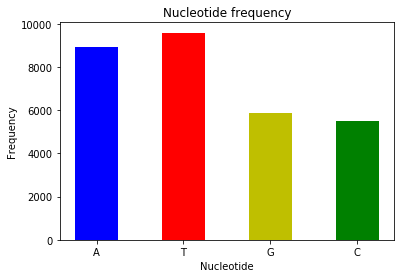

In [61]:
import matplotlib.pyplot as plt
width=0.5
plt.bar(count_nt.keys(),count_nt.values(),width,color=['b','r','y','g'])
plt.xlabel('Nucleotide')
plt.ylabel('Frequency')
plt.title('Nucleotide frequency')